In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv("./df_merged.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,DD_NS,POA,Po(p)
0,19038,6,31.25,31.67,20.3,27.5,83.0,0.0,0.0,-1,0,441.366227,996.39
1,19039,7,35.22,35.67,19.8,27.5,83.0,0.0,0.0,-1,0,441.366227,996.39
2,19040,8,39.62,40.14,20.7,27.5,83.0,0.0,0.0,-1,0,441.366227,996.39
3,19041,9,50.39,51.03,27.2,27.5,83.0,0.0,0.0,-1,0,441.366227,996.39
4,19042,10,25.24,25.64,17.4,27.5,83.0,0.0,0.0,-1,0,441.366227,996.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,50268,6,8.44,8.78,55.4,8.0,96.0,2.0,4.0,1,1,881.804242,1009.88
1921,50269,7,7.66,7.94,55.2,8.0,96.0,2.0,4.0,1,1,881.804242,1009.88
1922,50270,8,8.21,8.45,54.5,8.0,96.0,2.0,4.0,1,1,881.804242,1009.88
1923,50271,9,9.55,9.84,58.0,8.0,96.0,2.0,4.0,1,1,881.804242,1009.88


In [17]:
# Split the data based on 'device_id'
train_df = df[df['device_id'].isin([6, 7, 8, 9])]  # Data from the first four devices
test_df = df[df['device_id'] == 10]  # Data from the last device

# Define your features and target variable
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)']
X_train = train_df[features]
X_test = test_df[features]
y_train_ap = train_df['active_power']
y_test_ap = test_df['active_power']
y_train_dp = train_df['direct_power']
y_test_dp = test_df['direct_power']

# Handling missing values if there are any, you can replace with mean or another strategy
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train_ap = y_train_ap.fillna(y_train_ap.mean())
y_test_ap = y_test_ap.fillna(y_test_ap.mean())
y_train_dp = y_train_dp.fillna(y_train_dp.mean())
y_test_dp = y_test_dp.fillna(y_test_dp.mean())

AP_MAE: 9.294351470844019
AP_MSE: 155.6482467037108
AP_RMSE: 12.475906648565099
AP_R2 0.6995818635011397

DP_MAE: 9.443741633306928
DP_MSE: 160.24071774920466
DP_RMSE: 12.658622268999288
DP_R2 0.6973892862819666


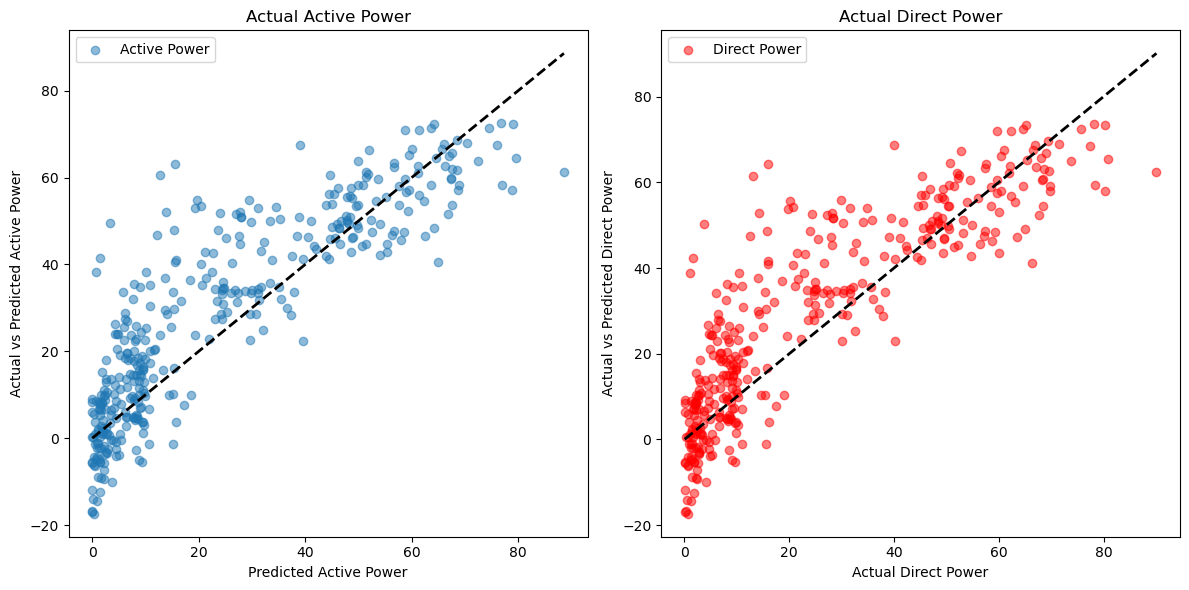

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train_ap)

# Make predictions using the testing set
y_pred_ap = model.predict(X_test)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()

model = LinearRegression()

# Train the model
model.fit(X_train, y_train_dp)
y_pred_dp = model.predict(X_test)

print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()

AP_MAE: 5.298067532467532
AP_MSE: 64.23967474285715
AP_RMSE: 8.014965673217644
AP_R2 0.8760104030450223

DP_MAE: 5.360119480519479
DP_MSE: 66.2326506909091
DP_RMSE: 8.138344468680906
DP_R2 0.8749212436230949


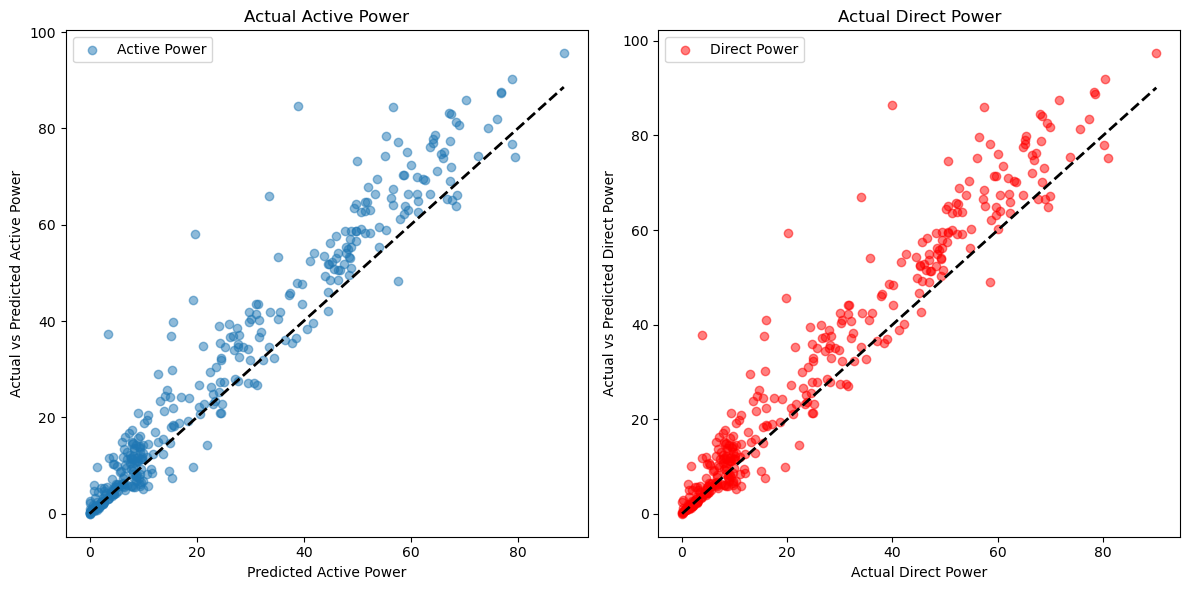

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN model
# You can adjust the number of neighbors and other parameters depending on your dataset
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train_ap)
y_pred_ap = knn_model.predict(X_test)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train_dp)
y_pred_dp = knn_model.predict(X_test)

print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()

AP_MAE: 4.783623376623377
AP_MSE: 64.54504633116882
AP_RMSE: 8.033993174702653
AP_R2 0.8754210024867564

DP_MAE: 4.843649350649351
DP_MSE: 66.44321646103896
DP_RMSE: 8.151270849446664
DP_R2 0.8745235952670551


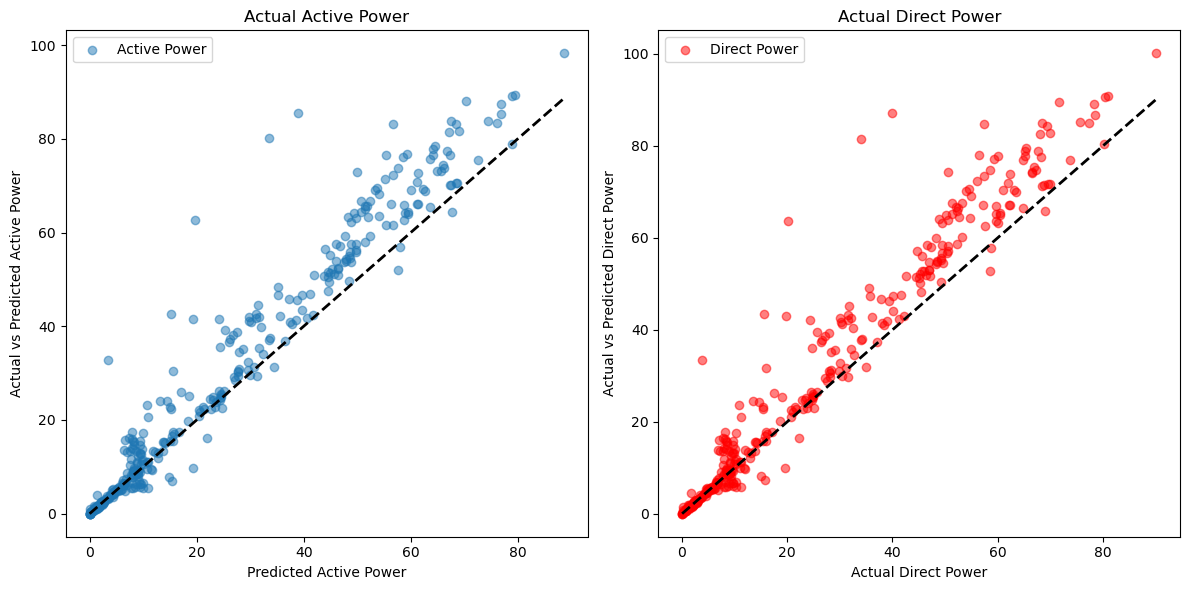

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train, y_train_ap)
y_pred_ap = dt_model.predict(X_test)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()

dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train, y_train_dp)
y_pred_dp = dt_model.predict(X_test)

print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()

AP_MAE: 4.811099574927237
AP_MSE: 64.35288734923307
AP_RMSE: 8.022025140152147
AP_R2 0.8757918903347547

DP_MAE: 4.871231777093036
DP_MSE: 66.20382482666216
DP_RMSE: 8.136573285275697
DP_R2 0.874975680569433


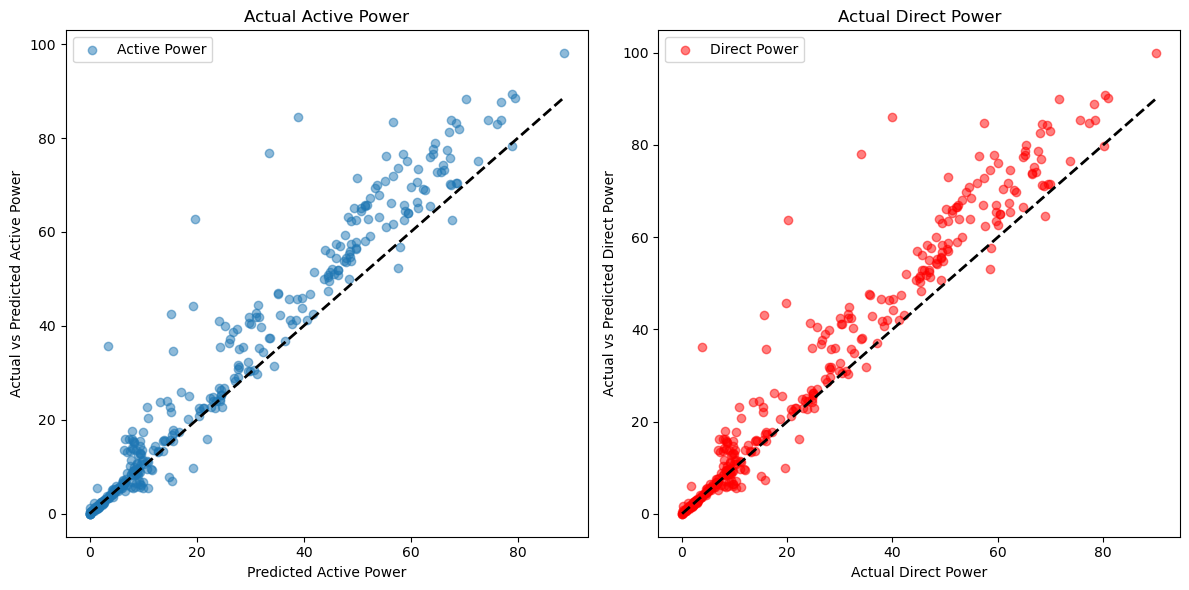

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train_ap)
y_pred_ap = rf_model.predict(X_test)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train_dp)
y_pred_dp = rf_model.predict(X_test)

print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()

AP_MAE: 4.783623376623377
AP_MSE: 64.54504633116882
AP_RMSE: 8.033993174702653
AP_R2 0.8754210024867564

DP_MAE: 4.8436493506493505
DP_MSE: 66.44321646103896
DP_RMSE: 8.151270849446664
DP_R2 0.8745235952670551


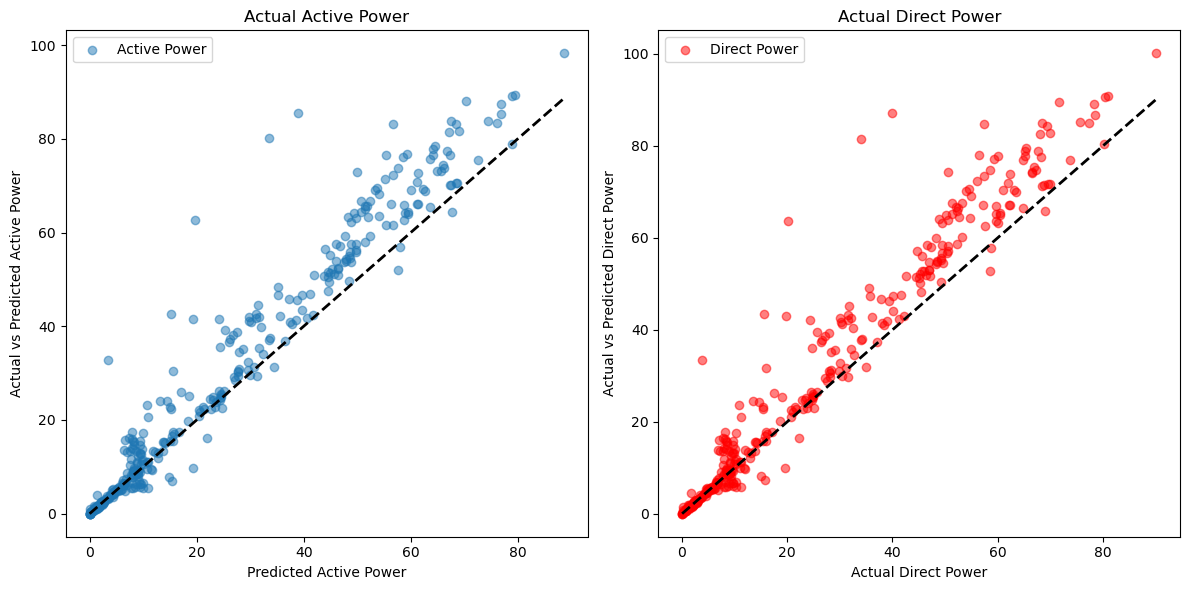

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=1)
gb_model.fit(X_train, y_train_ap)
y_pred_ap = gb_model.predict(X_test)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()

gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=1)
gb_model.fit(X_train, y_train_dp)
y_pred_dp = gb_model.predict(X_test)

print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 8
[LightGBM] [Info] Start training from score 28.151688
AP_MAE: 4.805982770157418
AP_MSE: 63.75882502652177
AP_RMSE: 7.984912336808825
AP_R2 0.8769384955791609

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 8
[LightGBM] [Info] Start training from score 28.707403
DP_MAE: 4.865005629281426
DP_MSE: 65.49036043289242
DP_RMSE: 8.092611471761908
DP_R2 0.8763230407937486


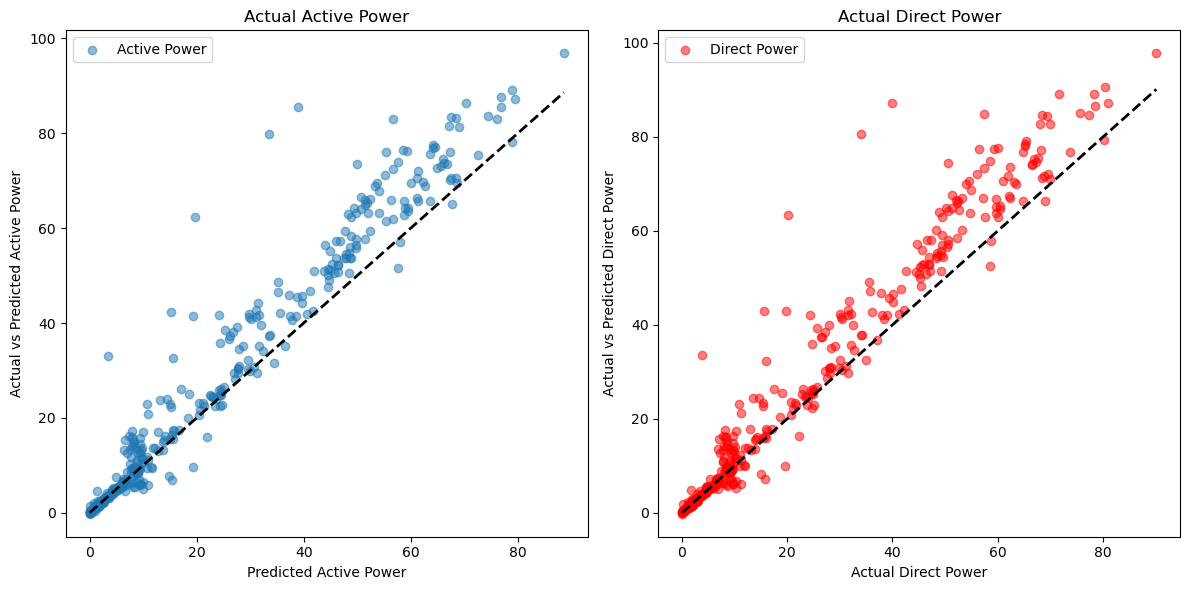

In [13]:
import lightgbm as lgb

# Create a LightGBM dataset
train_data_ap = lgb.Dataset(X_train, label=y_train_ap)
test_data_ap = lgb.Dataset(X_test, label=y_test_ap, reference=train_data_ap)

# Define the parameters for the model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.2,
    'feature_fraction': 0.9
}

# Train the model
gbm = lgb.train(params, train_data_ap, num_boost_round=100, valid_sets=[train_data_ap, test_data_ap])

# Make predictions using the testing set
y_pred_ap = gbm.predict(X_test, num_iteration=gbm.best_iteration)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()

# Create a LightGBM dataset
train_data_dp = lgb.Dataset(X_train, label=y_train_dp)
test_data_dp = lgb.Dataset(X_test, label=y_test_dp, reference=train_data_dp)

# Train the model
gbm = lgb.train(params, train_data_dp, num_boost_round=100, valid_sets=[train_data_dp, test_data_dp])

# Make predictions using the testing set
y_pred_dp = gbm.predict(X_test, num_iteration=gbm.best_iteration)

print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()

Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 334.6310 - val_loss: 153.4944
Epoch 2/100
39/39 [==============================] - 0s 834us/step - loss: 200.2443 - val_loss: 149.8799
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 180.3857 - val_loss: 235.6768
Epoch 4/100
39/39 [==============================] - 0s 845us/step - loss: 171.5838 - val_loss: 164.2152
Epoch 5/100
39/39 [==============================] - 0s 839us/step - loss: 165.4620 - val_loss: 231.1508
Epoch 6/100
39/39 [==============================] - 0s 845us/step - loss: 165.8796 - val_loss: 126.3093
Epoch 7/100
39/39 [==============================] - 0s 890us/step - loss: 151.0049 - val_loss: 155.3472
Epoch 8/100
39/39 [==============================] - 0s 1ms/step - loss: 152.8502 - val_loss: 162.9949
Epoch 9/100
39/39 [==============================] - 0s 878us/step - loss: 145.2515 - val_loss: 192.8594
Epoch 10/100
39/39 [==============================] - 0s 856u

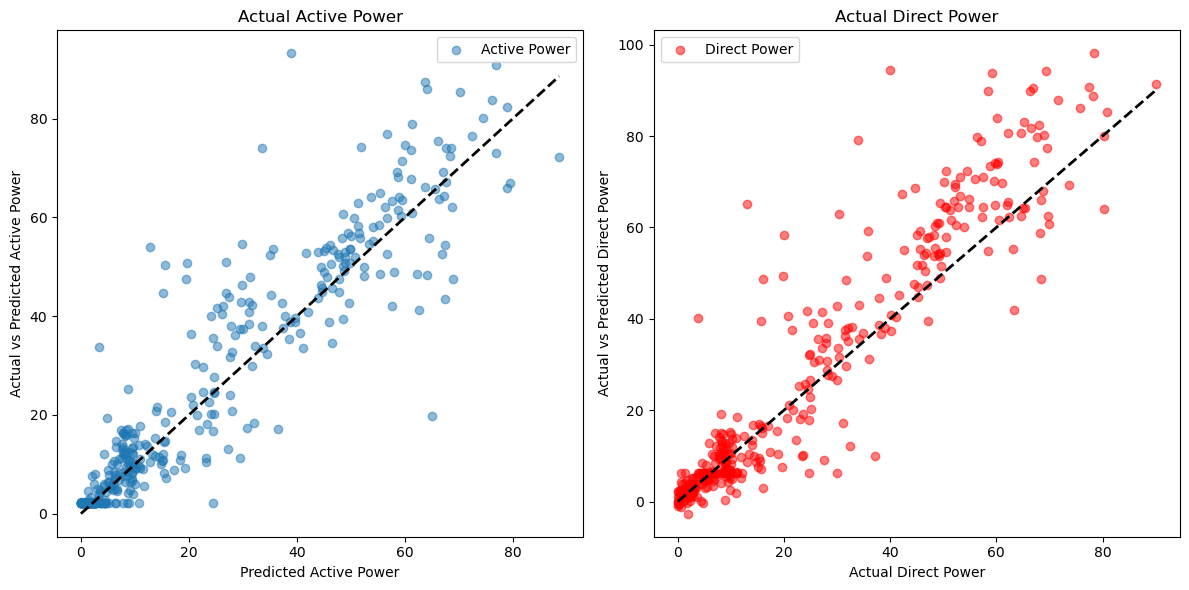

In [24]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)  # Output layer: Predicting 'active_power', hence no activation function
])

optimizer = Adam(learning_rate=0.05)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_ap, validation_split=0.2, epochs=100, batch_size=32)
#y_pred_ap = model.predict(X_test_scaled).flatten()
# Evaluate the model on the test set
#test_loss_ap = model.evaluate(X_test_scaled, y_test_ap)

# Predictions
y_pred_ap = model.predict(X_test_scaled)

model = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)  # Output layer: Predicting 'active_power', hence no activation function
])

optimizer = Adam(learning_rate=0.05)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_dp, validation_split=0.2, epochs=100, batch_size=32)
#y_pred_dp = model.predict(X_test_scaled).flatten()
# Evaluate the model on the test set
#test_loss_dp = model.evaluate(X_test_scaled, y_test_dp)

# Predictions
y_pred_dp = model.predict(X_test_scaled)

print('AP_MAE:', mean_absolute_error(y_test_ap, y_pred_ap))
print('AP_MSE:', mean_squared_error(y_test_ap, y_pred_ap))
print('AP_RMSE:', np.sqrt(mean_squared_error(y_test_ap, y_pred_ap)))
print('AP_R2', r2_score(y_test_ap, y_pred_ap))
print()
print('DP_MAE:', mean_absolute_error(y_test_dp, y_pred_dp))
print('DP_MSE:', mean_squared_error(y_test_dp, y_pred_dp))
print('DP_RMSE:', np.sqrt(mean_squared_error(y_test_dp, y_pred_dp)))
print('DP_R2', r2_score(y_test_dp, y_pred_dp))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Actual vs Predicted Active Power on the left
axs[0].scatter(y_test_ap, y_pred_ap, alpha=0.5, label='Active Power')
axs[0].plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], 'k--', lw=2)
axs[0].set_title('Actual Active Power')
axs[0].set_xlabel('Predicted Active Power')
axs[0].set_ylabel('Actual vs Predicted Active Power')
axs[0].legend()

# Plot for Actual vs Predicted Direct Power on the right
axs[1].scatter(y_test_dp, y_pred_dp, alpha=0.5, label='Direct Power', color='r')
axs[1].plot([y_test_dp.min(), y_test_dp.max()], [y_test_dp.min(), y_test_dp.max()], 'k--', lw=2)
axs[1].set_title('Actual Direct Power')
axs[1].set_xlabel('Actual Direct Power')
axs[1].set_ylabel('Actual vs Predicted Direct Power')
axs[1].legend()

plt.tight_layout()
plt.show()